In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Airbnb.csv',encoding="ISO-8859-1")  # Replace with your dataset file name


In [199]:
# Summary statistics of numerical features
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          

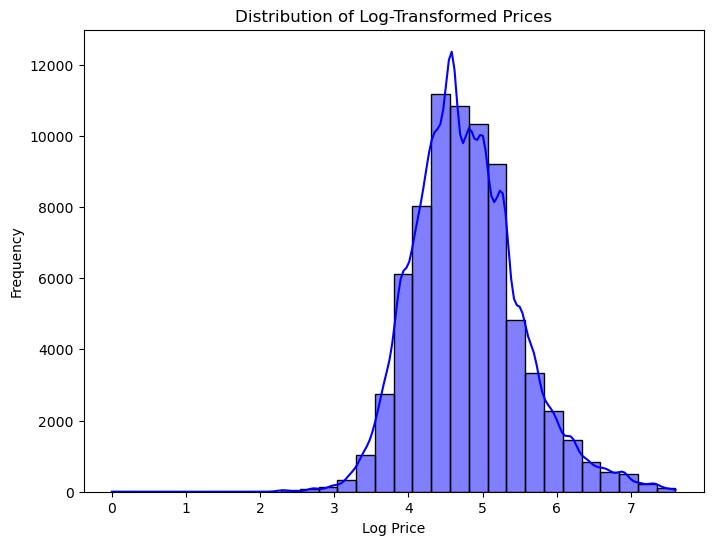

In [201]:
# Plot distribution of the 'log_price' column
plt.figure(figsize=(8, 6))
sns.histplot(df['log_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Log-Transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


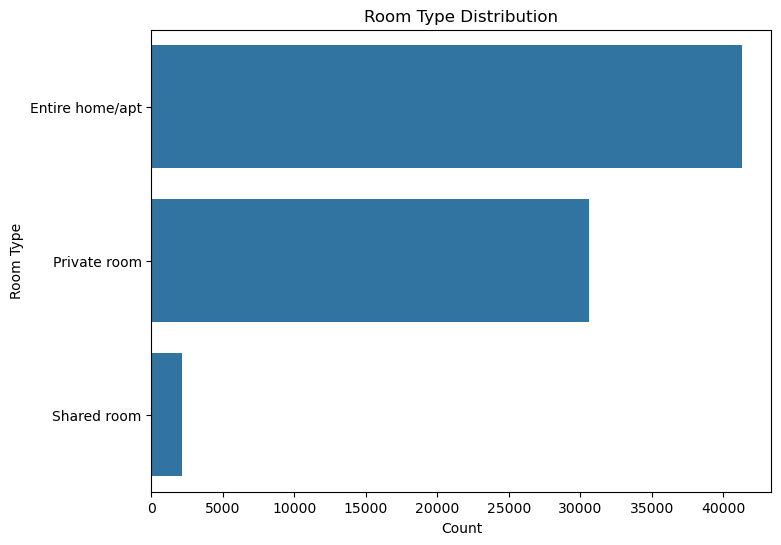

In [203]:
# Analyze distribution of 'room_type' (categorical feature)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()


In [205]:
# Check for missing values in the dataset
print("\nMissing Values Per Column:")
print(df.isnull().sum())



Missing Values Per Column:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
Unnamed: 29               74111
Unnamed: 30 

In [207]:
# Convert 'host_response_rate' to string type to avoid AttributeError
df['host_response_rate'] = df['host_response_rate'].astype(str)

# Remove the '%' symbol from the string and convert it to a float
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)

# Fill missing values in the 'host_response_rate' column with the median
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())


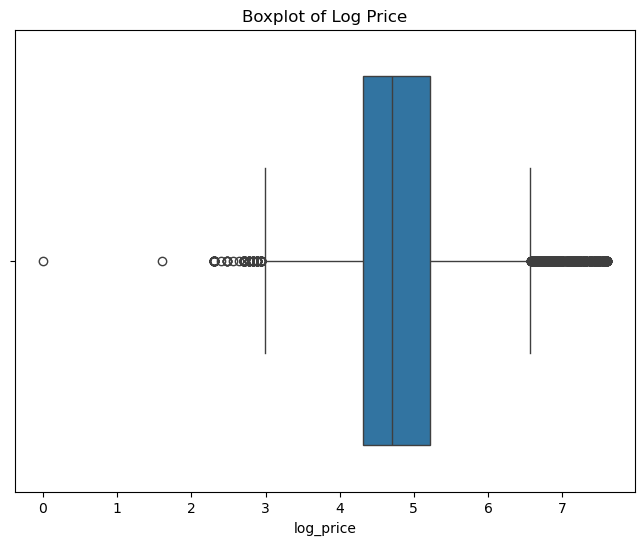

In [23]:
# Boxplot to visualize outliers in 'log_price' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='log_price')
plt.title('Boxplot of Log Price')
plt.show()


In [25]:
# Calculate the IQR for 'log_price'
q1, q3 = np.percentile(df['log_price'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df = df[(df['log_price'] >= lower_bound) & (df['log_price'] <= upper_bound)]


In [213]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features (e.g., 'accommodates', 'bathrooms')
scaler = StandardScaler()
df[['accommodates', 'bathrooms']] = scaler.fit_transform(df[['accommodates', 'bathrooms']])


In [215]:
# Apply log transformation to skewed variables like 'number_of_reviews'
df['number_of_reviews_log'] = np.log1p(df['number_of_reviews'])


In [217]:
# Count the number of amenities provided (e.g., from a comma-separated list)
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))


In [219]:
# Define the columns to drop
columns_to_drop = ['id', 'thumbnail_url', 'name', 'description', 'amenities', 'host_since']

# Drop only the columns that exist in the dataframe
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [43]:
# Check the final dataset
print("\nPreprocessed Dataset Shape:", df.shape)
print(df.head())

# Save the preprocessed dataset to a new file
df.to_csv('preprocessed_airbnb_data.csv', index=False)



Preprocessed Dataset Shape: (72579, 65)
   log_price  accommodates  bathrooms  bed_type  cleaning_fee city  \
0   5.010635     -0.040370  -0.403289  Real Bed          True  NYC   
1   5.129899      1.924128  -0.403289  Real Bed          True  NYC   
2   4.976734      0.941879  -0.403289  Real Bed          True  NYC   
4   4.744932     -0.531495  -0.403289  Real Bed          True   DC   
5   4.442651     -0.531495  -0.403289  Real Bed          True   SF   

  first_review host_has_profile_pic host_identity_verified  \
0   18-06-2016                    t                      t   
1   05-08-2017                    t                      f   
2   30-04-2017                    t                      t   
4   12-05-2015                    t                      t   
5   27-08-2017                    t                      t   

   host_response_rate  ... property_type_Yurt room_type_Private room  \
0               100.0  ...              False                  False   
1               100.0

In [221]:
# Specify the correct date format or use dayfirst=True
df['first_review'] = pd.to_datetime(df['first_review'], format='%d-%m-%Y', errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], format='%d-%m-%Y', errors='coerce')

# Alternatively, if you don't want to specify the exact format:
df['first_review'] = pd.to_datetime(df['first_review'], dayfirst=True, errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], dayfirst=True, errors='coerce')


In [223]:
print(df[['first_review', 'last_review']].head())
print(df[['first_review', 'last_review']].dtypes)


  first_review last_review
0   2016-06-18  2016-07-18
1   2017-08-05  2017-09-23
2   2017-04-30  2017-09-14
3          NaT         NaT
4   2015-05-12  2017-01-22
first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object


In [225]:
# Verify column existence
required_columns = ['property_type', 'room_type', 'cancellation_policy']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Proceed with feature engineering if all columns are present
    df = pd.get_dummies(df, columns=required_columns, drop_first=True)


Missing columns: ['property_type', 'room_type', 'cancellation_policy']


In [227]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [229]:
redundant_columns = ['property_type', 'room_type', 'cancellation_policy']
df = df.drop(columns=[col for col in redundant_columns if col in df.columns], errors='ignore')


In [231]:
# Step 1: Drop unnecessary columns like 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Step 2: Check for redundant original columns after transformation
redundant_columns = ['property_type', 'room_type', 'cancellation_policy']
df = df.drop(columns=[col for col in redundant_columns if col in df.columns], errors='ignore')

# Step 3: Verify transformed DataFrame
print(f"Cleaned DataFrame columns:\n{df.columns}")


Cleaned DataFrame columns:
Index(['log_price', 'accommodates', 'bathrooms', 'bed_type', 'cleaning_fee',
       'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
  

In [233]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale numerical features
numeric_cols = ['accommodates', 'bathrooms', 'beds', 'review_scores_rating', 'host_response_rate']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Log-transform highly skewed columns (e.g., price-related)
df['log_price'] = np.log1p(df['log_price'])  # log(1 + x) to handle zero values


In [235]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Dataset overview
print("Dataset Info:\n", df.info())
print("Dataset Description:\n", df.describe())


Missing values:
 log_price                                0
accommodates                             0
bathrooms                              200
bed_type                                 0
cleaning_fee                             0
                                      ... 
cancellation_policy_strict               0
cancellation_policy_super_strict_30      0
cancellation_policy_super_strict_60      0
number_of_reviews_log                    0
amenities_count                          0
Length: 62, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   log_price                            74111 non-null  float64       
 1   accommodates                         74111 non-null  float64       
 2   bathrooms                            73911 non-null  float64       
 3   bed_ty

In [237]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop(columns=['log_price'])  # Features
y = df['log_price']                 # Target (log-transformed price)

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split complete.")


Data split complete.


In [239]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print("Feature scaling complete.")


Feature scaling complete.


In [241]:
# Convert 'first_review' and 'last_review' columns to datetime if not already done
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce', dayfirst=True)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce', dayfirst=True)

# Calculate the number of days since 'first_review' and 'last_review'
df['days_since_first_review'] = (pd.to_datetime('today') - df['first_review']).dt.days
df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days

# Drop original date columns (optional)
df.drop(['first_review', 'last_review'], axis=1, inplace=True)


In [280]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply OneHotEncoder with sparse matrix output
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical_columns)  # Keep output sparse
    ],
    remainder='passthrough'  # Keep non-categorical columns as they are
)

# Apply transformation
X_transformed = preprocessor.fit_transform(X)

# If you need to convert to a dense DataFrame, but it's not recommended for large data
# X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=preprocessor.get_feature_names_out())

# Check the shape of the transformed matrix
print(X_transformed.shape)  # Sparse matrix shape


(74111, 1355)


In [282]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['log_price'])
y = df['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [269]:
# Check for non-numeric columns in your dataset
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['bed_type', 'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable', 'neighbourhood',
       'zipcode', 'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
       'property_type_Loft', 'property_type_Other',
       'property_type_Parking Space', 'property_type_Serviced apartment',
       'property_type_Tent', 'property_type_Timeshare', 'property_type_Tipi',
       'property_type_Townhouse

In [283]:
from sklearn.preprocessing import LabelEncoder

# Combine train and test data for consistent label encoding
y_combined = pd.concat([y_train, y_test])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit on the combined data and transform both train and test target variables
y_combined_encoded = label_encoder.fit_transform(y_combined)

# Split the transformed combined data back into training and testing sets
y_train_encoded = y_combined_encoded[:len(y_train)]
y_test_encoded = y_combined_encoded[len(y_train):]

# Now you can use y_train_encoded and y_test_encoded


In [284]:
from sklearn.preprocessing import LabelEncoder

# Apply encoding only to categorical features
label_encoder = LabelEncoder()

# Example: Encoding a categorical feature (e.g., 'city')
X_train['city_encoded'] = label_encoder.fit_transform(X_train['city'])
X_test['city_encoded'] = label_encoder.transform(X_test['city'])


In [285]:
print(X_train.dtypes)


accommodates               float64
bathrooms                  float64
bed_type                    object
cleaning_fee                  bool
city                        object
                            ...   
number_of_reviews_log      float64
amenities_count              int64
days_since_first_review    float64
days_since_last_review     float64
city_encoded                 int32
Length: 62, dtype: object


In [113]:
# Check for non-numeric values in the columns
for column in X_train.select_dtypes(include=['object']).columns:
    print(X_train[column].unique())


['10013' '90066' nan '10453' '90028' '11233' '11416' '10021' '90019'
 '10019' '10014' '60614' '11222' '90068' '11206' '91303' '11231' '90291'
 '11201' '10128' '10012' '94114' '90815' '10028' '20003' '11238' '10003'
 '2114' '11207' '90038' '91601' '11221' '60612' '90265' '10463' '10027'
 '10024' '90025' '90005' '10022' '94133' '10010' '11237' '94110' '20009'
 '11215' '20001' '91606' '10026' '10001' '10308' '2134' '90277' '90012'
 '11225' '90015' '60601' '94117' '91770' '20011' '20006' '90027' '10002'
 '91765' '11249' '90046' '60647' '2132' '90036' '10011' '2125' '60618'
 '11213' '2215' '10032' '10025' '2108' '11217' '11226' '10029' '60616'
 '94122' '11104' '90042' '94112' '20007' '11211' '90006' '10017' '94131'
 '91335' '10035' '10129' '20017' '90065' '11230' '94116' '20018' '90007'
 '91605' '90292' '90048' '2124' '11216' '11209' '90402' '11103' '91604'
 '11218' '90210' '60623' '91007' '10009' '10305' '11205' '10016' '91201'
 '90290' '10451' '94102' '10031' '90049' '60660' '20010' '1047

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df is your dataframe and 'log_price' is your target column
# Separate features (X) and target (y)
X = df.drop('log_price', axis=1)  # Replace 'log_price' with your actual target column
y = df['log_price']  # Replace 'log_price' with your target column name

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define the preprocessing for numeric and categorical data separately
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median for numeric columns
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent for categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine the transformers for numerical and categorical features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the full pipeline with preprocessing and the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Model training complete
print("Model training complete.")


Model training complete.


In [292]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model performance
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Display results
print(f"R² (Training): {r2_train:.2f}")
print(f"R² (Testing): {r2_test:.2f}")
print(f"MAE (Testing): {mae_test:.2f}")
print(f"RMSE (Testing): {rmse_test:.2f}")


R² (Training): 0.59
R² (Testing): 0.56
MAE (Testing): 0.06
RMSE (Testing): 0.08


In [296]:
# Accessing the model from the pipeline
linear_model = model.named_steps['regressor']

# Get the feature importance (coefficients) from the Linear Regression model
feature_importance = linear_model.coef_

# Print the importance of each feature
print(f"Feature Importance: {feature_importance}")


Feature Importance: [ 0.05943789  0.00253093 -0.00109519 ... -0.01046028  0.08003781
 -0.08436685]


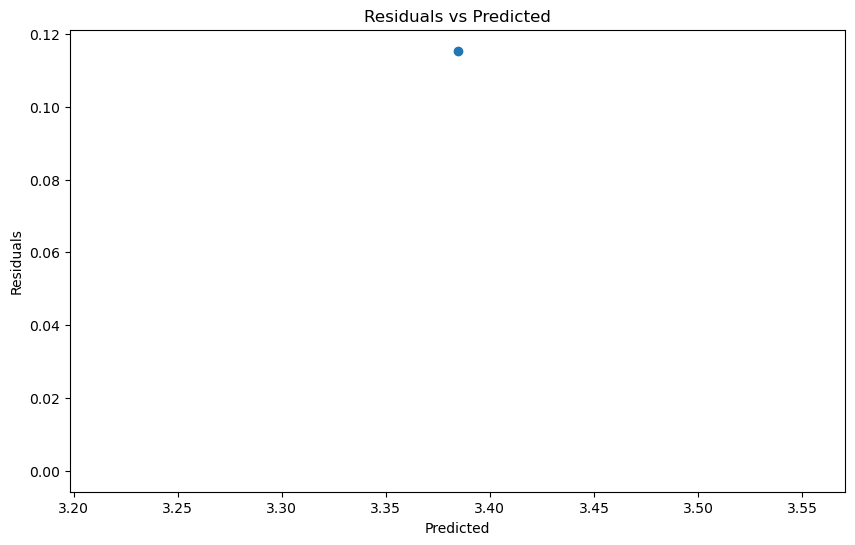

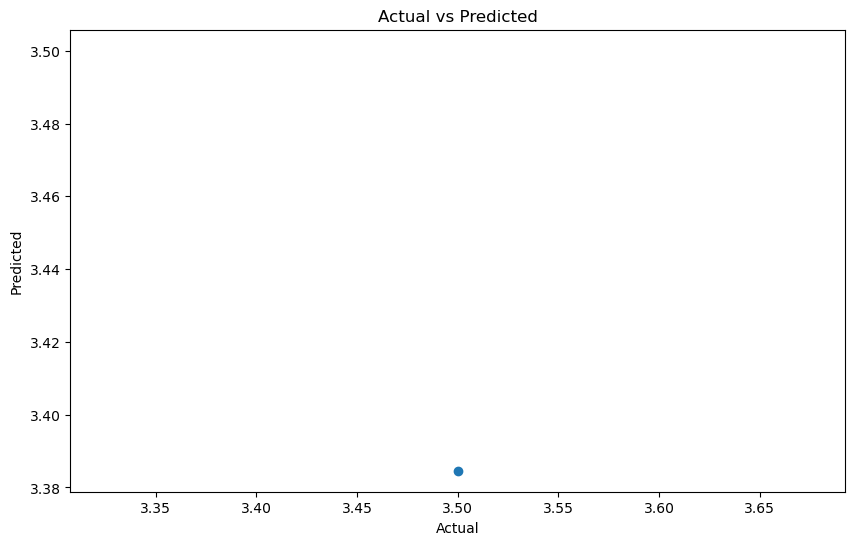

In [334]:
import matplotlib.pyplot as plt

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

# Predictions vs Actuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [300]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd

# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

# Define feature and target variables
X = df.drop(columns='log_price')  # Assuming 'log_price' is the target variable
y = df['log_price']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline with imputation and scaling for numeric data, and imputation and encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numeric columns
            ('scaler', StandardScaler())  # Scale numeric features
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent for categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
        ]), categorical_features)
    ]
)

# Create a pipeline with preprocessing and LinearRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Apply linear regression model
])

# Perform cross-validation (using RMSE as the scoring metric)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Convert the negative RMSE values to positive
cv_rmse = -cv_scores

# Print cross-validation results
print(f"Cross-validation RMSE scores: {cv_rmse}")
print(f"Mean Cross-validation RMSE: {cv_rmse.mean()}")
print(f"Standard Deviation of Cross-validation RMSE: {cv_rmse.std()}")


Cross-validation RMSE scores: [0.08233777 0.08189704 0.08041213 0.08048651 0.08103121]
Mean Cross-validation RMSE: 0.08123293288816807
Standard Deviation of Cross-validation RMSE: 0.0007659332593834457


In [304]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming df is your DataFrame
# Define feature and target variables
X = df.drop(columns='log_price')  # Assuming 'log_price' is the target variable
y = df['log_price']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline with imputation and scaling for numeric data,
# and imputation and encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numeric columns
            ('scaler', StandardScaler())  # Scale numeric features
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent for categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
        ]), categorical_features)
    ]
)

# Define the pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  # Linear Regression model
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__fit_intercept': [True, False]  # Hyperparameters for LinearRegression
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit grid search
grid_search.fit(X, y)

# Best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Best score from grid search
print(f"Best RMSE: {-grid_search.best_score_}")


Best parameters: {'model__fit_intercept': True}
Best RMSE: 0.08123293288816807


In [332]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the performance of the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Correct way to calculate RMSE
mae = mean_absolute_error(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")


Test RMSE: 0.11541732189853082
Test MAE: 0.11541732189853082


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [308]:
# Example: new_data could be a new dataset you're using for predictions or testing
new_data = pd.DataFrame([...])  # Ensure you define or load new_data properly
print("Training data columns:", X_train.columns)
print("New data columns:", new_data.columns)


Training data columns: Index(['accommodates', 'bathrooms', 'bed_type', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
       'property_type_Loft', 'property_type_Other',
     

In [310]:
# Add missing columns to new_data
missing_columns = set(X_train.columns) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = None  # or use np.nan if you prefer

# Ensure the column order matches
new_data = new_data[X_train.columns]  # Reorder to match the training set


In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example dataset (you should replace this with your actual dataset)
df = pd.DataFrame({
    # Add sample data for demonstration purposes
    'accommodates': [4, 6, 2],
    'bathrooms': [2, 1, 1],
    'bedrooms': [2, 3, 1],
    'beds': [2, 3, 1],
    'host_response_rate': [0.9, 0.85, 0.95],
    'latitude': [40.7128, 34.0522, 51.5074],
    'longitude': [-74.0060, -118.2437, -0.1276],
    'number_of_reviews': [120, 300, 15],
    'review_scores_rating': [4.5, 4.7, 3.8],
    'log_price': [3.5, 4.0, 2.8],  # target variable (log-transformed price)
    'property_type': ['Apartment', 'House', 'Condo'],
    'room_type': ['Entire home/apt', 'Private room', 'Shared room'],
    'bed_type': ['Real Bed', 'Futon', 'Real Bed'],
    'cancellation_policy': ['Flexible', 'Strict', 'Moderate'],
    'cleaning_fee': ['Yes', 'No', 'Yes'],
    'city': ['New York', 'Los Angeles', 'London'],
    'description': ['Spacious apartment', 'Cozy house', 'Nice condo'],
    'first_review': ['2020-01-01', '2019-06-15', '2021-03-10'],
    'host_has_profile_pic': ['Yes', 'Yes', 'No'],
    'host_identity_verified': ['Yes', 'No', 'Yes'],
    'host_since': ['2015-01-01', '2017-05-05', '2019-02-10'],
    'last_review': ['2023-11-20', '2023-09-15', '2023-11-10'],
    'neighbourhood': ['Manhattan', 'Hollywood', 'Westminster'],
    'zipcode': ['10001', '90001', 'SW1A 1AA'],
})

# Feature columns (excluding target variable 'log_price')
X = df.drop(columns=['log_price'])
y = df['log_price']

# Split into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_response_rate',
                  'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating']

categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee',
                    'city', 'description', 'host_has_profile_pic', 'host_identity_verified',
                    'neighbourhood', 'zipcode']

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical data
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Full column transformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Define the model
model = LinearRegression()

# Create the full pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline (this will fit both the preprocessor and model)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")

# Example of predicting on new data (make sure new_data has the same columns as X_train)
new_data = pd.DataFrame({
    'accommodates': [4],
    'bathrooms': [2],
    'bedrooms': [2],
    'beds': [2],
    'host_response_rate': [0.9],
    'latitude': [40.7128],
    'longitude': [-74.0060],
    'number_of_reviews': [120],
    'review_scores_rating': [4.5],
    'property_type': ['Apartment'],
    'room_type': ['Entire home/apt'],
    'bed_type': ['Real Bed'],
    'cancellation_policy': ['Flexible'],
    'cleaning_fee': ['Yes'],
    'city': ['New York'],
    'description': ['Spacious apartment'],
    'first_review': ['2020-01-01'],
    'host_has_profile_pic': ['Yes'],
    'host_identity_verified': ['Yes'],
    'host_since': ['2015-01-01'],
    'last_review': ['2023-11-20'],
    'neighbourhood': ['Manhattan'],
    'zipcode': ['10001']
})

# Predict on new data using the fitted pipeline
new_predictions = pipeline.predict(new_data)
print("Predicted Log Price for New Data:", new_predictions)


Test RMSE: 0.11541732189853082
Test MAE: 0.11541732189853082
Predicted Log Price for New Data: [3.38458268]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [314]:
import numpy as np
predicted_price = np.exp(new_predictions[0])
print(f"Predicted Price for New Data: {predicted_price}")


Predicted Price for New Data: 29.505676781423745


In [316]:
cv_scores = cross_val_score(pipeline, X, y, cv=3, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-cv_scores.mean()}")


Cross-validated RMSE: 0.3073749318971079


In [318]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
cv_scores = cross_val_score(pipeline, X, y, cv=loo, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE (LOO): {-cv_scores.mean()}")


Cross-validated RMSE (LOO): 0.3073749318971079


In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit your pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = pipeline.predict(X_test)


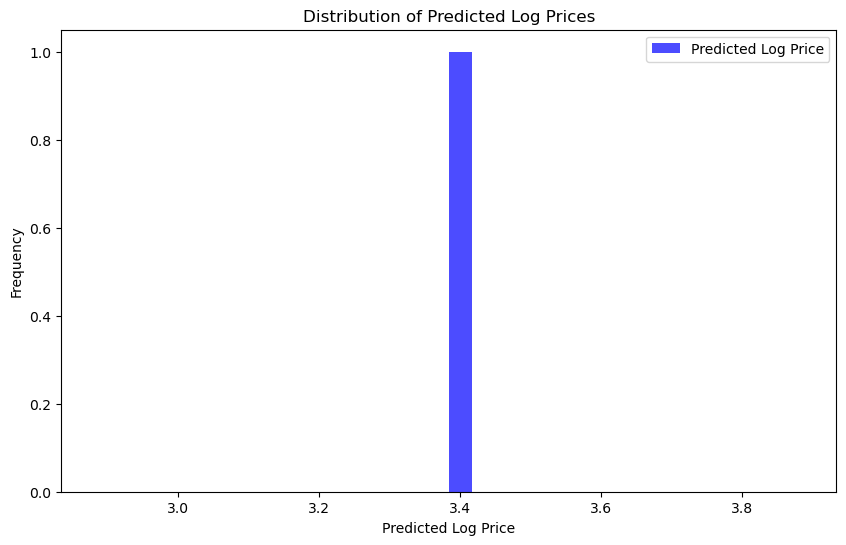

In [191]:
# Make predictions
new_predictions = pipeline.predict(new_data)

# Store the predictions in a new column 'predicted_log_price'
new_data['predicted_log_price'] = new_predictions

# Now you can plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(new_data['predicted_log_price'], bins=30, alpha=0.7, color='blue', label='Predicted Log Price')
plt.xlabel('Predicted Log Price')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Log Prices')
plt.legend()
plt.show()


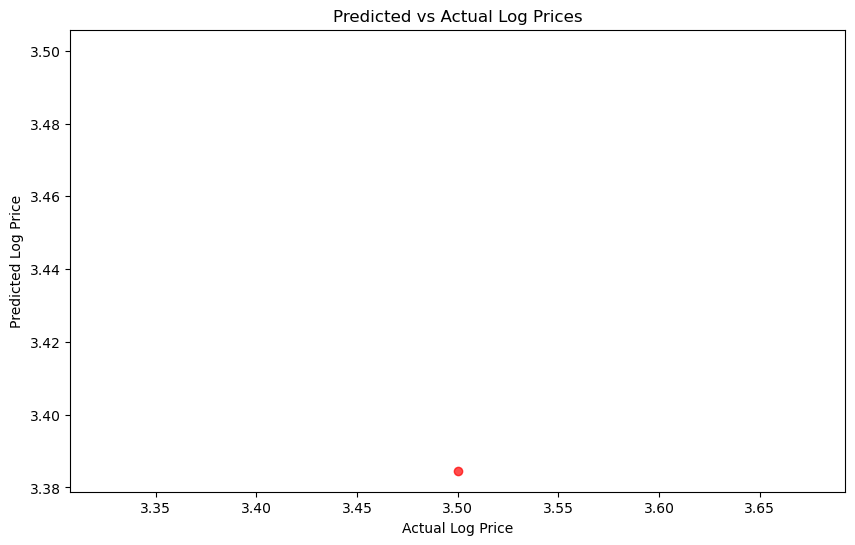

In [344]:
# Make predictions using the trained model
y_pred = pipeline.predict(X_test)

# Assuming you want to plot actual vs predicted log prices:
import matplotlib.pyplot as plt

# If you don't already have 'actual_log_price' in your test data, you can use 'y_test' for the actual log prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Predicted vs Actual Log Prices')
plt.show()


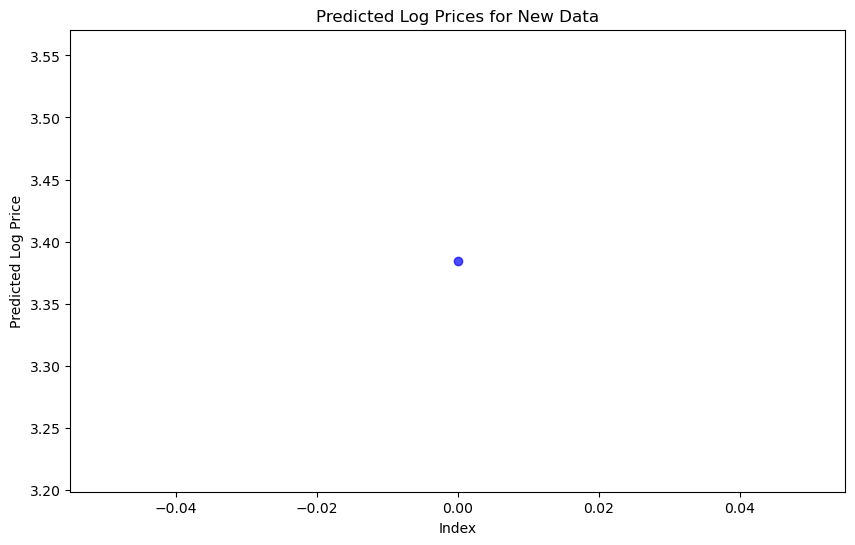

In [346]:
# Assuming new_data has the features and you want to predict the log price
new_predictions = pipeline.predict(new_data)

# Plotting the predicted log prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(new_data)), new_predictions, alpha=0.7, color='blue')
plt.xlabel('Index')
plt.ylabel('Predicted Log Price')
plt.title('Predicted Log Prices for New Data')
plt.show()
